In [107]:
import os
from pathlib import Path

import numpy as np
import skimage as sk
import cv2 as cv
from commonfunctions import *

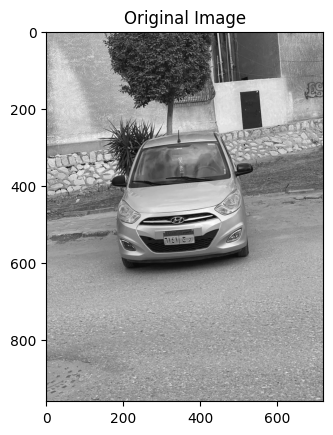

In [108]:
img = cv.imread("Dataset\\Vehicles\\1932.jpg", cv.IMREAD_GRAYSCALE)
show_images([img], ["Original Image"])

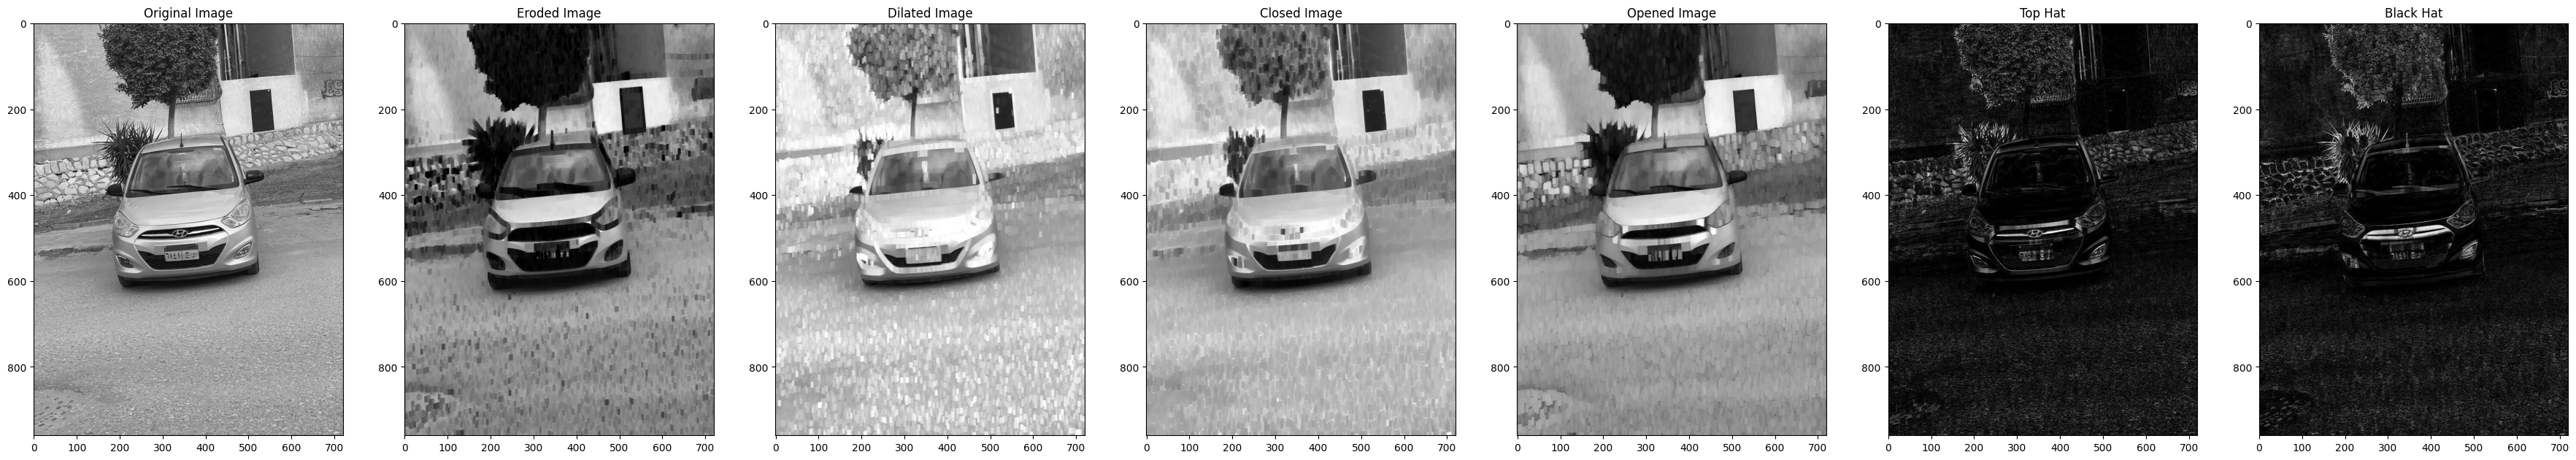

In [109]:
'''
apply morphological operations to grayscale images as well. 
In fact, both the top hat/white hat and the black hat operators are more suited
for grayscale images rather than binary ones.
'''
kernel_width = 13
kernel_height = 5
kernel = cv.getStructuringElement(cv.MORPH_RECT, (kernel_height, kernel_width))
eroded_image = cv.erode(img, kernel, iterations=1)
dilated_image = cv.dilate(img, kernel, iterations=1)
closed_image = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
opened_image = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
top_hat = img - opened_image
black_hat = closed_image - img
show_images([img,eroded_image, dilated_image, closed_image, opened_image, top_hat, black_hat], ["Original Image","Eroded Image","Dilated Image","Closed Image","Opened Image","Top Hat","Black Hat"])

#show_images([img,eroded_image, dilated_image, closed_image, opened_image], ["Original Image","Eroded Image","Dilated Image","Closed Image","Opened Image"])

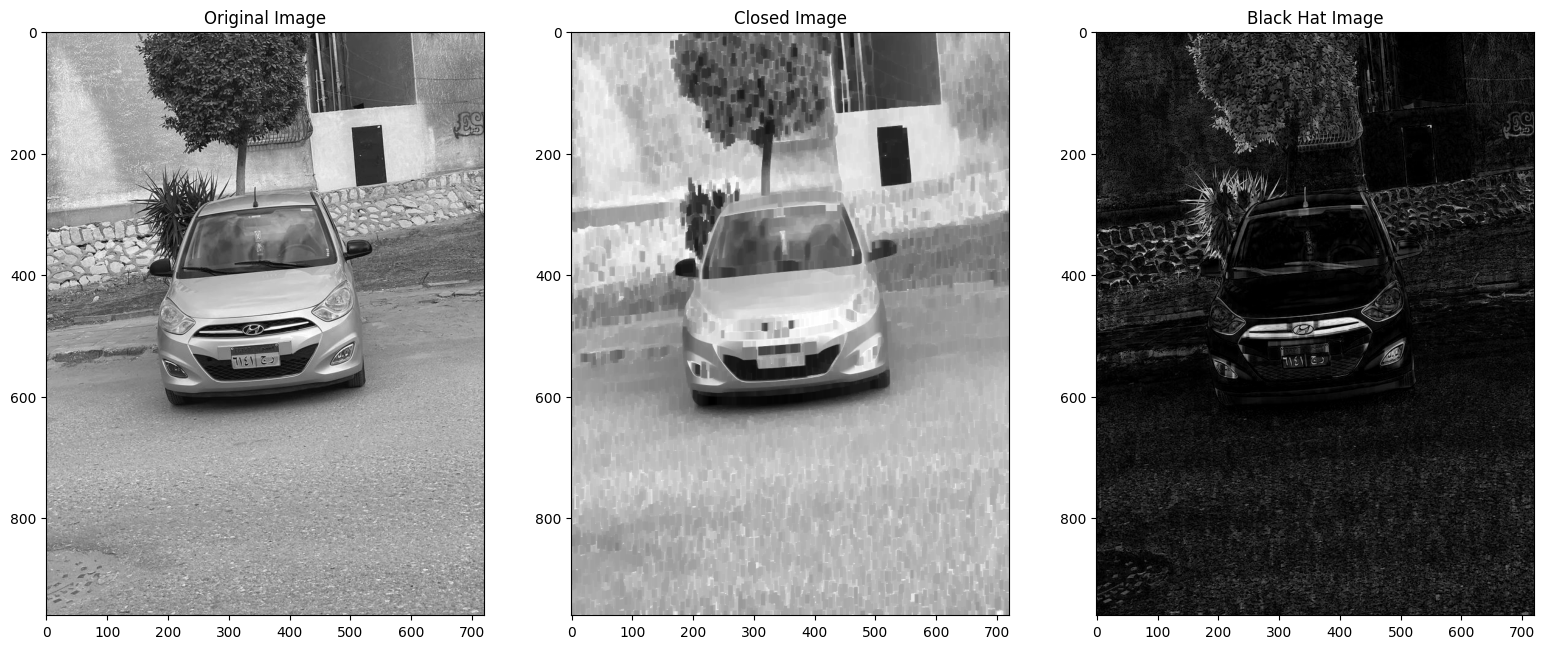

In [110]:
'''
apply morphological operations to grayscale images as well. 
In fact, both the top hat/white hat and the black hat operators are more suited
for grayscale images rather than binary ones.
'''
kernel_width = 13
kernel_height = 5
kernel = cv.getStructuringElement(cv.MORPH_RECT, (kernel_height, kernel_width))

#Top hat is the difference between the input image and its opening
#Basic idea is that the top hat operator is used to reveal bright regions on a dark background
top_hat_image = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
#Black hat is the difference between the closing of the input image and the input image
#Basic idea is that the black hat operator is used to reveal dark regions on a light background
#since the closing operation is used to remove small dark spots from the image
black_hat_image = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

closed_image = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
show_images([img,closed_image, black_hat_image], ["Original Image","Closed Image","Black Hat Image"])

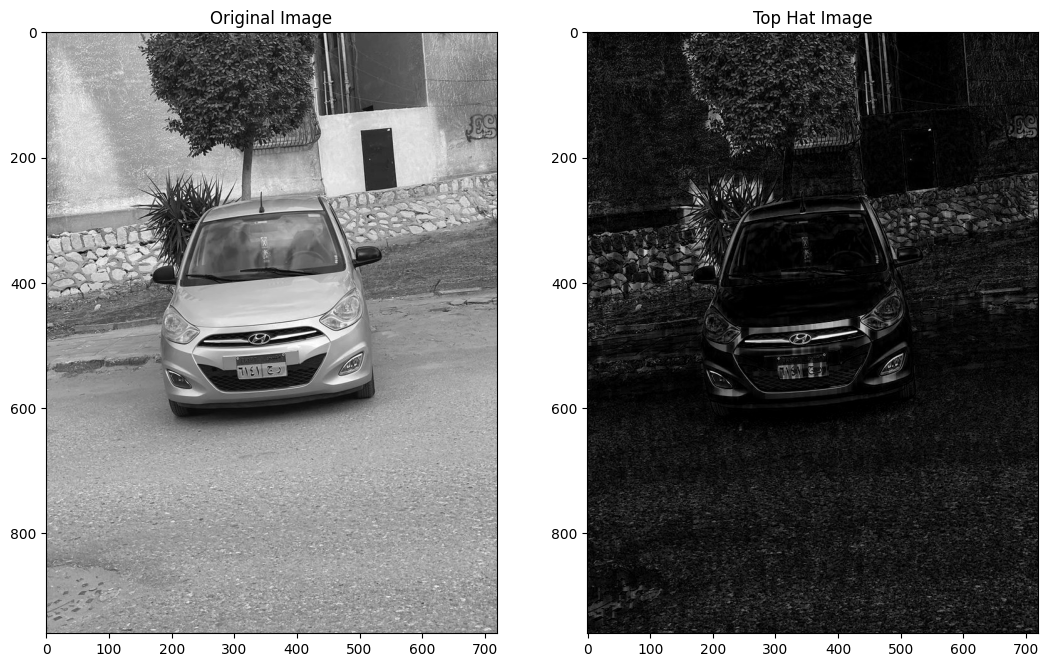

In [111]:
show_images([img, top_hat_image], ["Original Image", "Top Hat Image"])

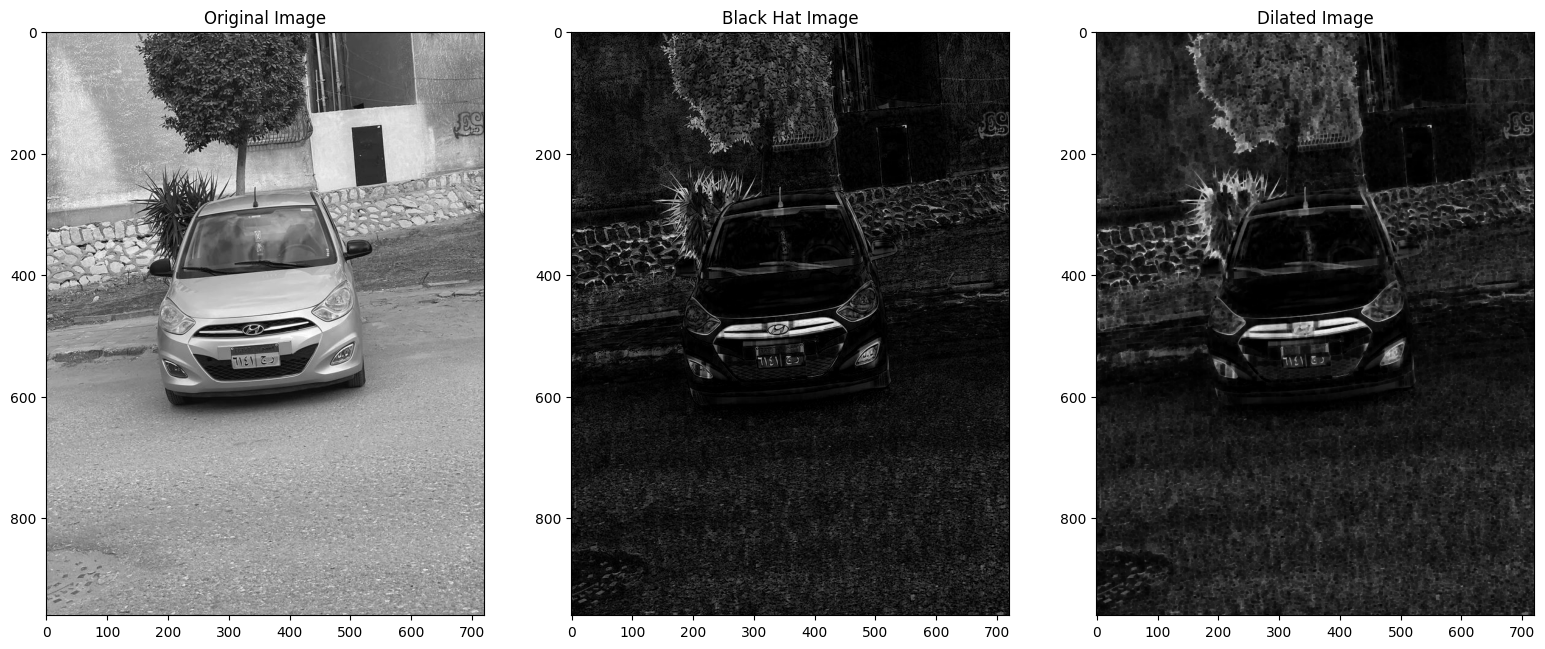

In [112]:
#Till now we have showed regions that contains dark spots on light background
#Which are candidates for the license plate
#We want to extract the license plate region from the image
kernel_width = 3
kernel_height = 3
kernel = cv.getStructuringElement(cv.MORPH_RECT, (kernel_height, kernel_width))
closed_image = cv.morphologyEx(black_hat_image, cv.MORPH_CLOSE, kernel, iterations=1)
show_images([img, black_hat_image,closed_image], ["Original Image","Black Hat Image", "Dilated Image"])

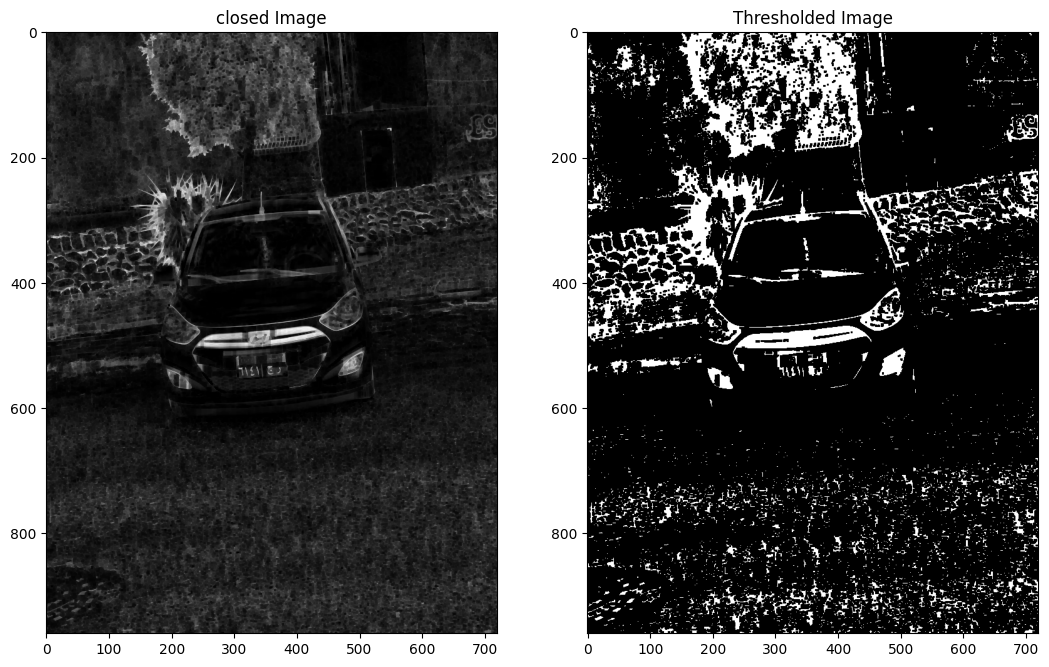

In [113]:
#threshold to extract dark and light regions
"""
In global thresholding, we used an arbitrary chosen value as a threshold.
In contrast, Otsu's method avoids having to choose a value and determines it automatically.
Consider an image with only two distinct image values (bimodal image),
where the histogram would only consist of two peaks.
A good threshold would be in the middle of those two values. Similarly,
Otsu's method determines an optimal global threshold value from the image histogram.
"""
_, thresholded_image = cv.threshold(closed_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
show_images([closed_image, thresholded_image], ["closed Image", "Thresholded Image"])

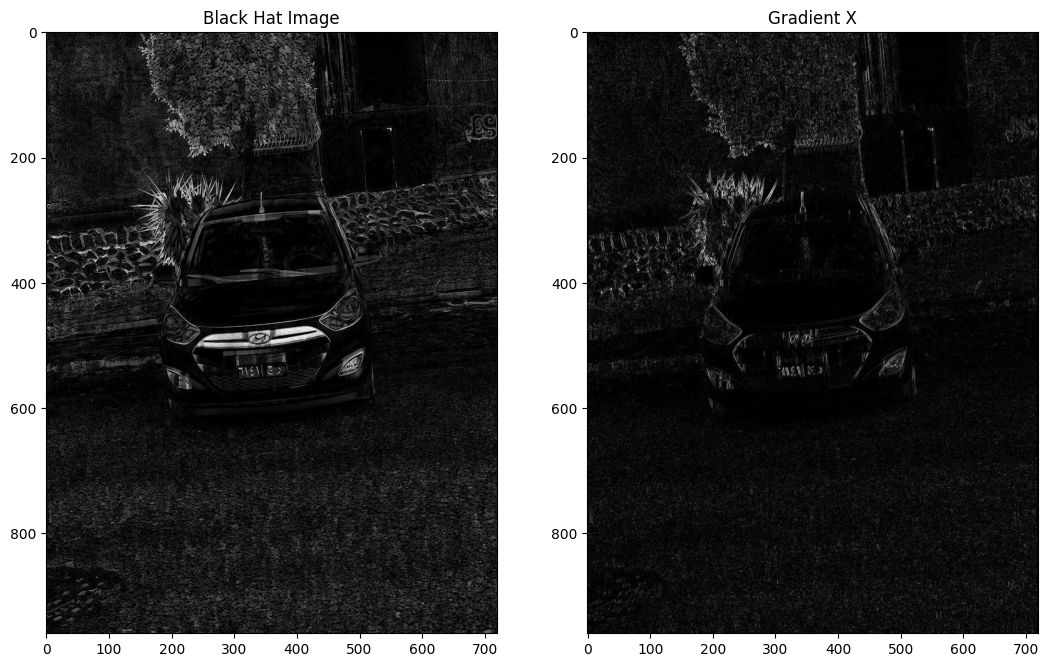

In [114]:
grad_x = cv.Sobel(black_hat_image, cv.CV_64F, 1, 0, ksize=3)
grad_x = abs(grad_x)
#scale grad_x to 0-255
grad_x = cv.normalize(grad_x, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
show_images([black_hat_image, grad_x], ["Black Hat Image", "Gradient X"])

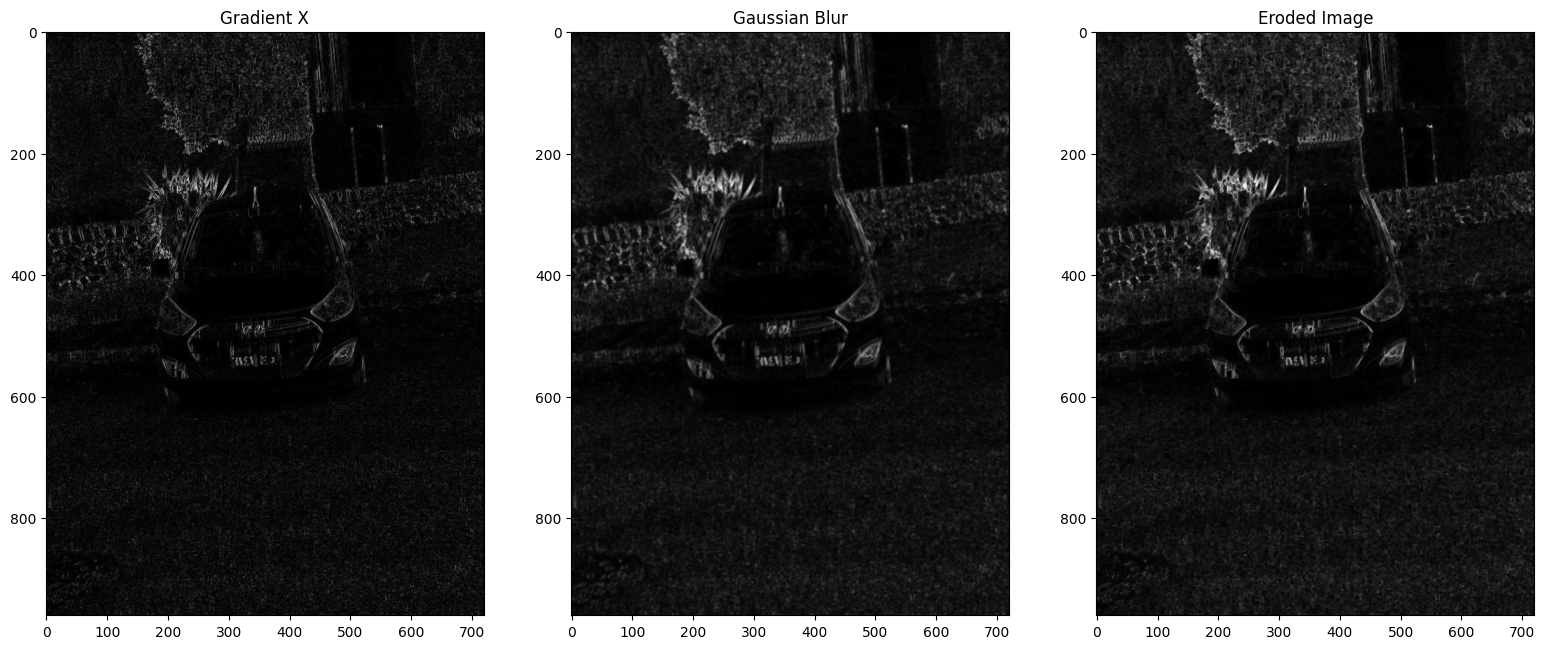

In [115]:
grad_x_gaussian = cv.GaussianBlur(grad_x, (5, 5), 0)
grad_x_eroded = cv.morphologyEx(grad_x, cv.MORPH_CLOSE, kernel, iterations=1)
show_images([grad_x, grad_x_gaussian, grad_x_eroded], ["Gradient X", "Gaussian Blur", "Eroded Image"])


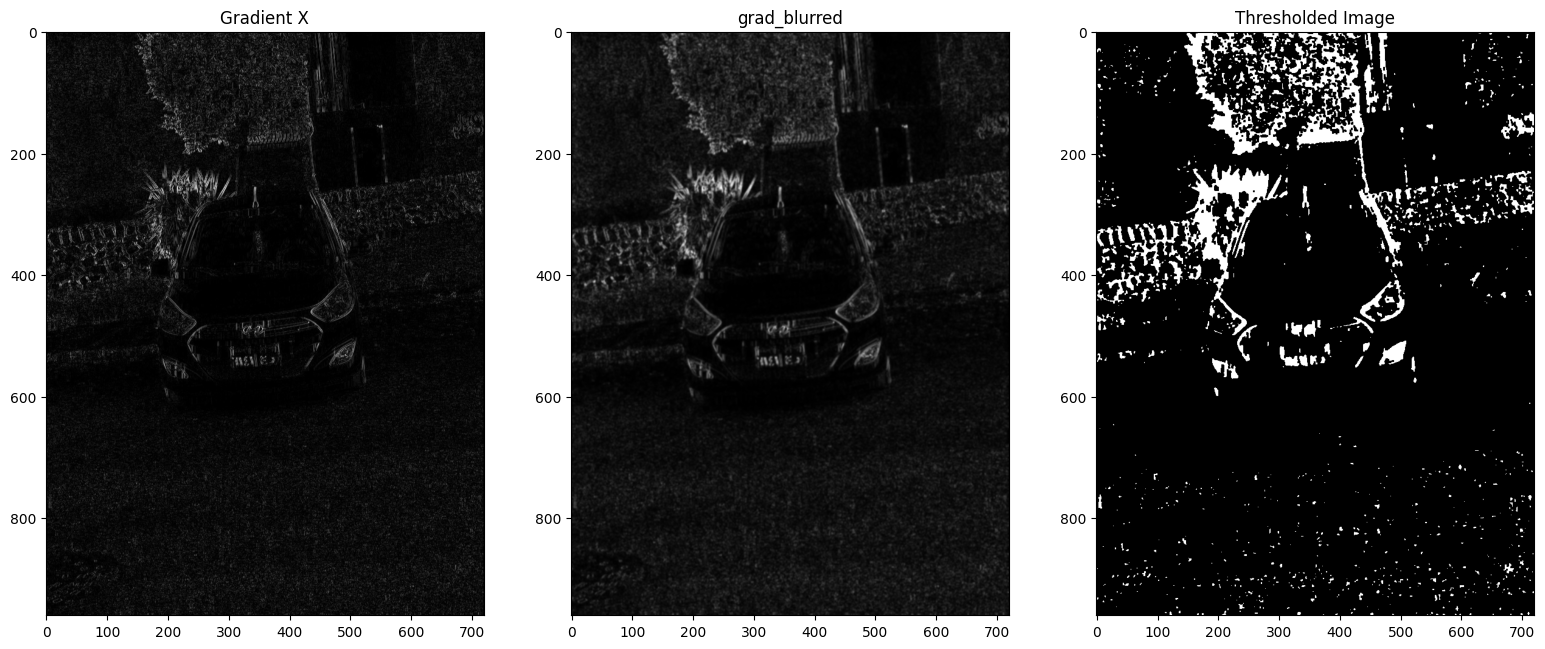

In [116]:
grad_blurred = cv.GaussianBlur(grad_x, (5, 5), 0)
gradX = cv.morphologyEx(grad_blurred, cv.MORPH_CLOSE, kernel, iterations=1)
thresholded_image = cv.threshold(gradX, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
show_images([grad_x, grad_blurred, thresholded_image], ["Gradient X", "grad_blurred", "Thresholded Image"])

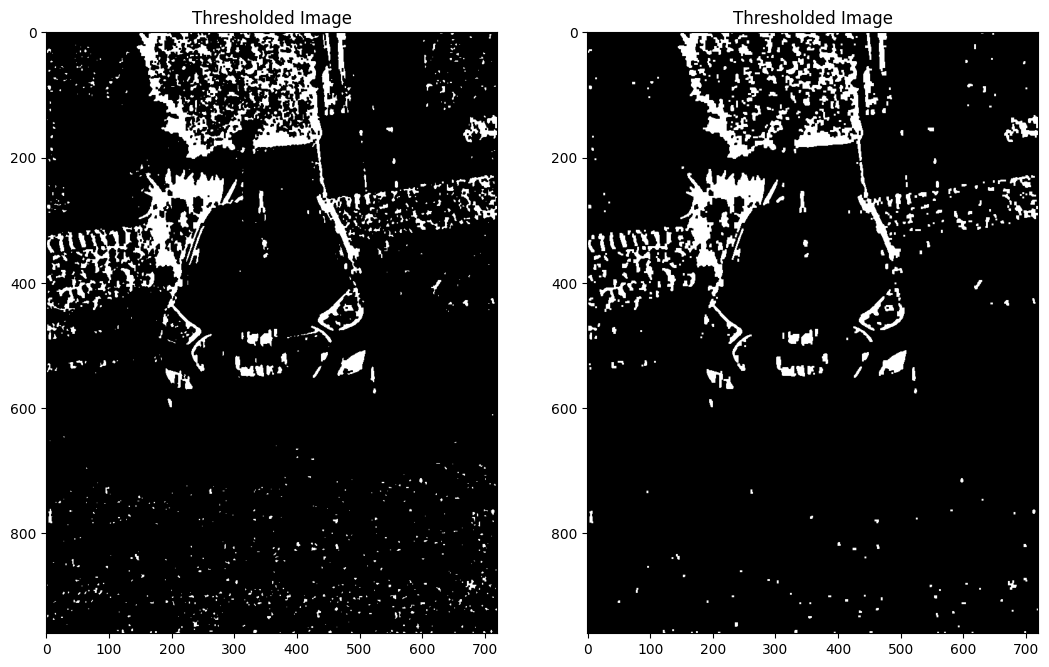

In [117]:
thresh = cv.erode(thresholded_image, kernel, iterations=1)
thresh = cv.dilate(thresh, kernel, iterations=1)
show_images([thresholded_image, thresh], ["Thresholded Image", "Thresholded Image"])

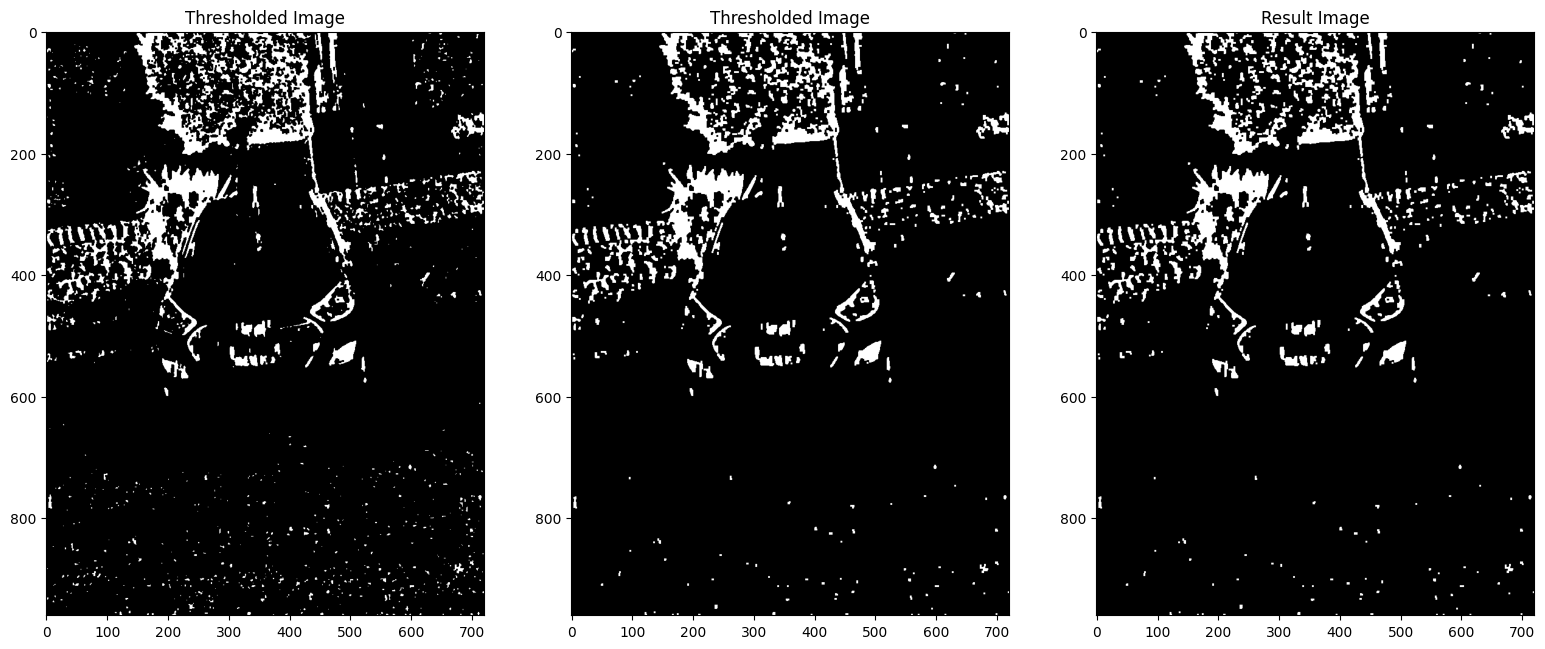

In [118]:
res_image = cv.bitwise_and(thresholded_image, thresh)
show_images([thresholded_image, thresh, res_image], ["Thresholded Image", "Thresholded Image", "Result Image"])
